# 使用 NumPy 实现简单神经网络拟合回归问题

本 Notebook 演示如何使用 NumPy 手动实现一个简单的两层神经网络，利用 ReLU 激活函数和均方误差损失拟合目标函数：

$$ f(x)=\sin(x)+0.1x^2 $$

整个过程包括数据生成、参数初始化、前向传播、反向传播以及结果的可视化。

In [1]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt

## 定义目标函数和数据生成

目标函数定义为：

$$ f(x)=\sin(x)+0.1x^2 $$

同时，定义了 `generate_data` 函数，在区间 [-5, 5] 内随机生成样本数据，其中训练集包含 1000 个样本，测试集包含 200 个均匀采样的数据。

In [2]:
# 定义目标函数
def target_func(x):
    return np.sin(x) + 0.1 * (x ** 2)

# 生成训练和测试数据的函数
def generate_data(n):
    x = np.random.uniform(-5, 5, size=(n, 1))
    y = target_func(x)
    return x, y

# 生成数据：训练集1000个样本，测试集200个均匀采样
x_train, y_train = generate_data(1000)
x_test = np.linspace(-5, 5, 200).reshape(-1, 1)
y_test = target_func(x_test)

## 参数初始化及权重初始化

设置网络结构和训练参数：

- 输入层维度：1
- 隐藏层单元数：64
- 输出层维度：1
- 学习率：0.001
- 训练轮数（epochs）：5000
- 批量大小：32

采用 He 初始化方法初始化权重。

In [3]:
# 参数初始化
input_size = 1
hidden_units = 64
output_size = 1
learning_rate = 0.001
epochs = 5000
batch_size = 32

# He 初始化权重
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_units) * np.sqrt(2. / input_size)
b1 = np.zeros((1, hidden_units))
W2 = np.random.randn(hidden_units, output_size) * np.sqrt(2. / hidden_units)
b2 = np.zeros((1, output_size))

## 定义前向传播函数和均方误差损失

前向传播函数 `forward` 包括隐藏层计算和 ReLU 激活，输出层为线性变换；

同时定义了均方误差（MSE）作为损失函数。

In [4]:
# 前向传播函数
def forward(x):
    h1 = np.dot(x, W1) + b1
    h1_relu = np.maximum(0, h1)  # ReLU 激活
    y_pred = np.dot(h1_relu, W2) + b2
    return y_pred, h1_relu

# 均方误差损失函数
def mse_loss(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

## 训练循环

训练过程中，首先将训练数据打乱，然后按小批量进行前向传播、计算梯度、反向传播并更新参数。

每个 epoch 结束后，计算并记录训练集和测试集的损失，同时每 100 个 epoch 输出一次当前的损失情况。

In [5]:
# 训练循环
train_losses = []
test_losses = []

for epoch in range(epochs):
    # 打乱训练数据
    permutation = np.random.permutation(len(x_train))
    x_shuffled = x_train[permutation]
    y_shuffled = y_train[permutation]
    
    # 小批量训练
    for i in range(0, len(x_train), batch_size):
        x_batch = x_shuffled[i:i+batch_size]
        y_batch = y_shuffled[i:i+batch_size]
        
        # 前向传播
        y_pred, h1_relu = forward(x_batch)
        
        # 计算梯度
        grad_y_pred = 2 * (y_pred - y_batch) / batch_size
        
        # 反向传播，计算各层梯度
        dW2 = np.dot(h1_relu.T, grad_y_pred)
        db2 = np.sum(grad_y_pred, axis=0, keepdims=True)
        
        grad_h1_relu = np.dot(grad_y_pred, W2.T)
        grad_h1 = grad_h1_relu * (h1_relu > 0)  # ReLU 导数
        
        dW1 = np.dot(x_batch.T, grad_h1)
        db1 = np.sum(grad_h1, axis=0, keepdims=True)
        
        # 更新参数
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
    
    # 每个 epoch 结束后计算训练和测试损失
    train_pred, _ = forward(x_train)
    train_loss = mse_loss(train_pred, y_train)
    test_pred, _ = forward(x_test)
    test_loss = mse_loss(test_pred, y_test)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

Epoch 0, Train Loss: 0.5946, Test Loss: 0.5937
Epoch 100, Train Loss: 0.2046, Test Loss: 0.2074
Epoch 200, Train Loss: 0.1068, Test Loss: 0.1095
Epoch 300, Train Loss: 0.0763, Test Loss: 0.0788
Epoch 400, Train Loss: 0.0602, Test Loss: 0.0638
Epoch 500, Train Loss: 0.0434, Test Loss: 0.0453
Epoch 600, Train Loss: 0.0336, Test Loss: 0.0356
Epoch 700, Train Loss: 0.0273, Test Loss: 0.0290
Epoch 800, Train Loss: 0.0236, Test Loss: 0.0255
Epoch 900, Train Loss: 0.0210, Test Loss: 0.0225
Epoch 1000, Train Loss: 0.0191, Test Loss: 0.0208
Epoch 1100, Train Loss: 0.0178, Test Loss: 0.0193
Epoch 1200, Train Loss: 0.0176, Test Loss: 0.0189
Epoch 1300, Train Loss: 0.0162, Test Loss: 0.0175
Epoch 1400, Train Loss: 0.0156, Test Loss: 0.0169
Epoch 1500, Train Loss: 0.0152, Test Loss: 0.0166
Epoch 1600, Train Loss: 0.0155, Test Loss: 0.0170
Epoch 1700, Train Loss: 0.0146, Test Loss: 0.0158
Epoch 1800, Train Loss: 0.0140, Test Loss: 0.0153
Epoch 1900, Train Loss: 0.0141, Test Loss: 0.0153
Epoch 2000, 

## 绘制损失曲线

训练完成后，绘制训练集和测试集的损失曲线，以观察模型的收敛情况。

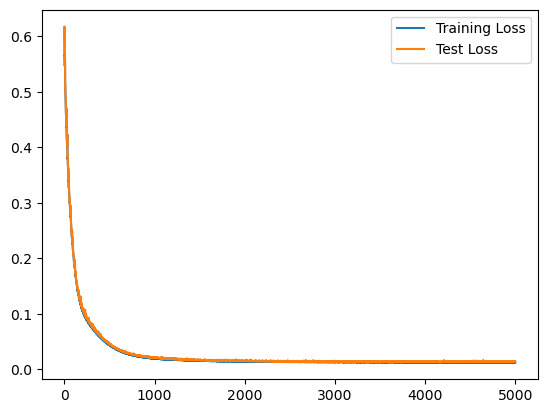

In [6]:
# 绘制损失曲线
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.show()

## 绘制真实函数与模型预测对比

最后，将训练数据、真实的目标函数曲线以及模型预测的曲线绘制在同一图中进行比较。

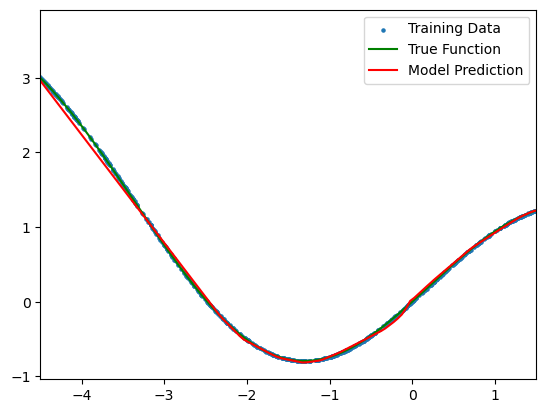

In [7]:
# 绘制真实函数与模型预测对比
plt.scatter(x_train, y_train, s=5, label='Training Data')
plt.plot(x_test, y_test, label='True Function', color='green')
plt.plot(x_test, forward(x_test)[0], label='Model Prediction', color='red')
plt.legend()
plt.xlim(-4.5, 1.5)
plt.show()